# Conditional Probability & Bayes' Theorem

An example of using conditional probabilities and Bayes' Theorem to calculate the probability of a student scoring high given that she studies a certain amount.

Data source: https://www.kaggle.com/uciml/student-alcohol-consumption

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data_raw = pd.read_csv("../assets/student-alcohol-consumption-math.csv")
data_scores = data_raw[["studytime", "G3"]]
data_scores.head()

,studytime,G3
0,2,6
1,2,6
2,2,10
3,3,15
4,2,10


Ultimately, we would like to use Bayes' Theorem to calculate:

\begin{equation*}
P(\text{High Score | Study Interval}) = \frac{P(\text{Study Interval | High Score})P(\text{High Score})}{P(\text{Study Interval})}
\end{equation*}

#### 1. Calculate the Marginal Likelihood: P(Study Interval)

This corresponds to the probability that a student studied in one of the four study intervals.

In [41]:
temp = data_scores["studytime"].value_counts()
p_studyinterval = pd.DataFrame(temp / temp.sum()).sort_index()
p_studyinterval.index = ["< 2 hours","2 to 5 hours","5 to 10 hours","> 10 hours"]
p_studyinterval.columns = ["Probability"]
p_studyinterval.columns.name = "Study Interval"
p_studyinterval

Study Interval,Probability
< 2 hours,0.265823
2 to 5 hours,0.501266
5 to 10 hours,0.164557
> 10 hours,0.068354


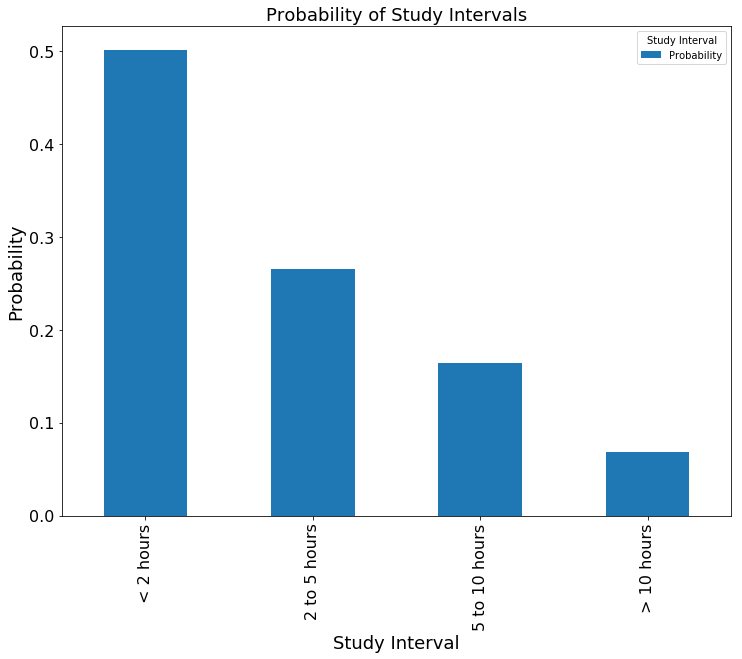

In [27]:
p_studyinterval.plot.bar(figsize=(12,9),fontsize=16)
plt.xlabel("Study Interval",fontsize=18)
plt.ylabel("Probability",fontsize=18)
plt.title("Probability of Study Intervals",fontsize=18)
plt.show()

#### 2. Calculate the Prior: P(High Score)

This corresponds to the probability that a student earned a high score, defined as a total of 15 points out of 20.

In [33]:
score = 15
temp = pd.DataFrame((data_scores["G3"] >= score).value_counts())
p_highscore = temp / temp.sum()
p_highscore.columns = ["Probability"]
p_highscore.index = ["Low", "High"]
p_highscore

,Probability
Low,0.81519
High,0.18481


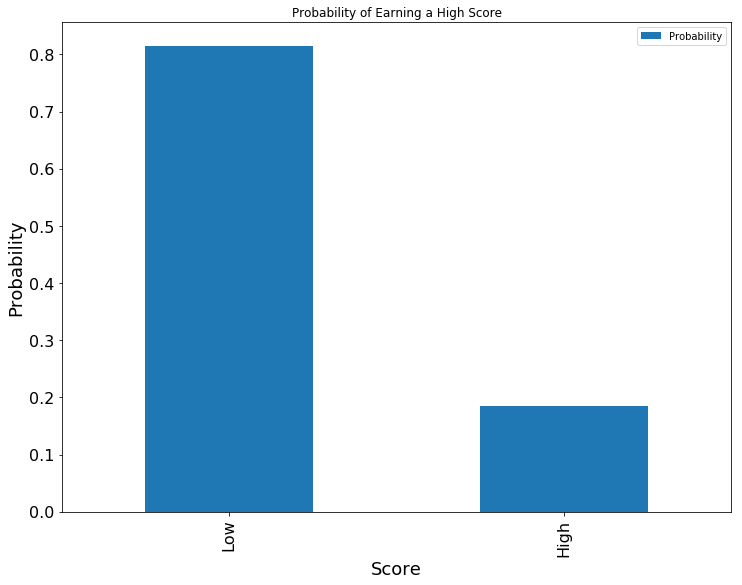

In [45]:
p_highscore.plot.bar(figsize=(12,9),fontsize=16)
plt.xlabel("Score",fontsize=18)
plt.ylabel("Probability",fontsize=18)
plt.title("Probability of Earning a High Score")
plt.show()

#### 3. Calculate the Likelihood: P(Study Interval | High Score)

This corresponds to the probability of a student falling into each of the study intervals given that she has earned a high score.

In [43]:
temp = data_scores[data_scores["G3"] >= score]["studytime"].value_counts()
p_studyinterval_given_highscore = pd.DataFrame(temp / temp.sum()).sort_index()
p_studyinterval_given_highscore.index = ["< 2 hours","2 to 5 hours","5 to 10 hours","> 10 hours"]
p_studyinterval_given_highscore.columns = ["Probability"]
p_studyinterval_given_highscore.columns.name = "Study Interval"
p_studyinterval_given_highscore

Study Interval,Probability
< 2 hours,0.246575
2 to 5 hours,0.424658
5 to 10 hours,0.232877
> 10 hours,0.095890


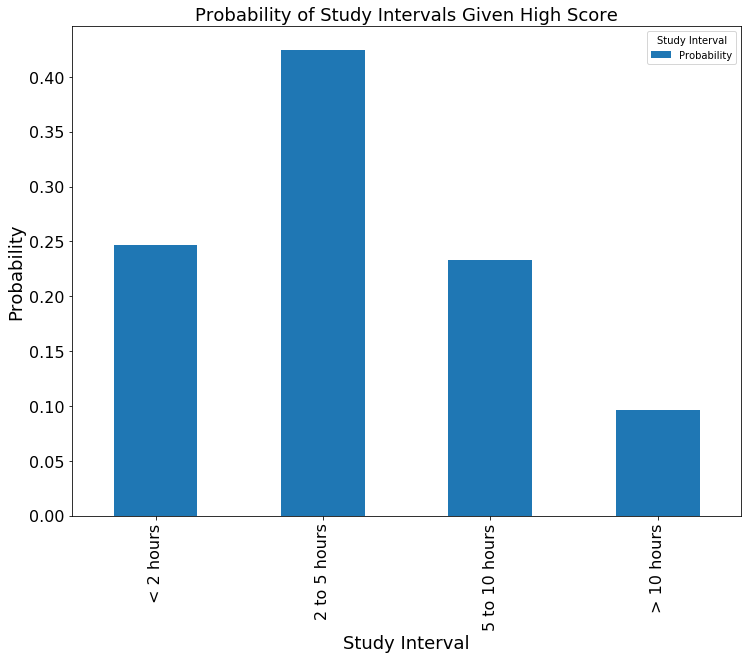

In [46]:
p_studyinterval_given_highscore.plot.bar(figsize=(12,9),fontsize=16)
plt.xlabel("Study Interval",fontsize=18)
plt.ylabel("Probability",fontsize=18)
plt.title("Probability of Study Intervals Given High Score",fontsize=18)
plt.show()

#### 4. Calculate Posterior: P(High Score | Study Interval)

This corresponds to our predicted probability for a student to earn a high score given how much they have studied.

In [48]:
p_highscore_given_studyinterval = (p_studyinterval_given_highscore * p_highscore.loc["High"]) / p_studyinterval
p_highscore_given_studyinterval

Study Interval,Probability
< 2 hours,0.171429
2 to 5 hours,0.156566
5 to 10 hours,0.261538
> 10 hours,0.259259


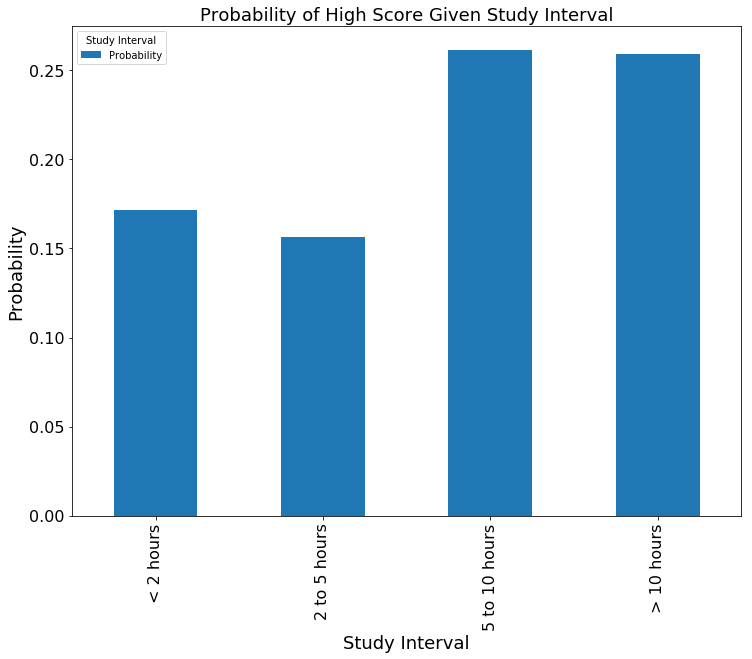

In [49]:
p_highscore_given_studyinterval.plot.bar(figsize=(12,9),fontsize=16)
plt.xlabel("Study Interval",fontsize=18)
plt.ylabel("Probability",fontsize=18)
plt.title("Probability of High Score Given Study Interval",fontsize=18)
plt.show()

#### Observations

Students who study from 5 to 10 hours have a much higher probability of scoring high marks compared to students who study less than 5 hours. However, there are diminishing returns; as the graph above illustrates, the probability of scoring high levels off for students who study greater than 10 hours. This generally fits with our expectations in that the more you study, the more likely you are to score high. The probability plateau above 10 hours may reflect the point where students become burnt out and are no longer able to assimilate new information.